In [3]:
import pandas as pd
import numpy as np

In [43]:
train= pd.read_csv('C:/Users/ssssa/Desktop/Telstra/train_new1.csv')
test=pd.read_csv('C:/Users/ssssa/Desktop/Telstra/test_new1.csv')

In [44]:
train.head()

,fault_severity,id,location,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,...,resource_type 1,resource_type 10,resource_type 2,resource_type 3,resource_type 4,resource_type 5,resource_type 6,resource_type 7,resource_type 8,resource_type 9
0,1.0,14121,148,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,9320,1027,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,14394,186,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,8218,1051,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.0,14804,151,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [45]:
%matplotlib inline
import matplotlib.pylab as plt
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True)
data.shape

(18552, 196)

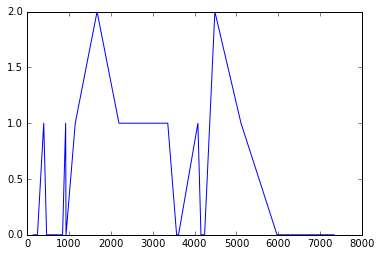

In [46]:
locbool = data['location']==0
plt.plot(data.loc[locbool,'fault_severity'])

In [47]:
loc_counter = {}
def loc_count(x):
    if x['location'] in loc_counter:
        loc_counter[x['location']]+=1
    else:
        loc_counter[x['location']]=1
    return loc_counter[x['location']]
data['location_occurence_count'] = data[['id','location']].apply(loc_count,axis=1)

In [48]:
locbool = data['location']==832
data.loc[locbool,['id','location','location_occurence_count']].head()

,id,location,location_occurence_count
149,15209,832,1
249,6234,832,2
259,411,832,3
342,6187,832,4
360,3214,832,5


In [49]:
data.loc[:,['id','location','location_occurence_count']].head(10)
data.shape

(18552, 197)

In [50]:
event_type= pd.read_csv("C:/Users/ssssa/Desktop/Telstra/event_type.csv") 
Id_events = pd.DataFrame(event_type['id'].value_counts()).rename(columns={'id':'Id_events'})

In [51]:
Id_events.head()

,Id_events
10354,11
15184,10
14243,10
17023,9
8590,9


In [52]:
data= data.merge(Id_events, right_index=True, left_index=True, how='left').fillna(0)
        

In [53]:
data.shape

(18552, 198)

In [54]:
data.loc[:,['id','location','location_occurence_count']].head(5)

,id,location,location_occurence_count
0,14121,148,1
1,9320,1027,1
2,14394,186,1
3,8218,1051,1
4,14804,151,1


In [59]:
data.loc[:,['id','location','fault_severity','severity_type']].head()

,id,location,fault_severity,severity_type
0,14121,148,1.0,NaN
1,9320,1027,0.0,NaN
2,14394,186,1.0,NaN
3,8218,1051,1.0,NaN
4,14804,151,0.0,NaN
5,1080,754,0.0,NaN
6,9731,728,0.0,NaN
7,15505,153,0.0,NaN
8,3443,309,1.0,NaN
9,13300,698,1.0,NaN


In [64]:
severity_type=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/severity_type.csv")


In [77]:
df=data

In [76]:
data.loc[:,['location','fault_severity','severity_type']].head(5)

,location,fault_severity,severity_type
0,148,1.0,NaN
1,1027,0.0,NaN
2,186,1.0,NaN
3,1051,1.0,NaN
4,151,0.0,NaN


In [80]:
df['num'] = sev.groupby('location')['fault_severity'].transform(lambda x: np.arange(x.shape[0])+1)


In [81]:
df.shape

(18552, 199)